In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tqdm import tqdm

In [3]:
data = np.loadtxt('data.dat')

n = len(data)

indices = np.arange(n)
Even = (indices%2) == 0
print(Even)

[ True False  True ... False  True False]


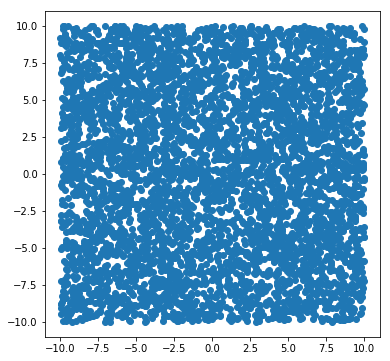

In [8]:
fig = plt.figure(figsize=(6,6))
plt.scatter(data[Even],data[~Even])

In [36]:
class MyRandom():
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
            
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt(Npoints)* np.abs(  np.mean(array**moment) - 1./(1.+moment) )

In [14]:
rand = MyRandom(seed = 6625, method='drand48')

In [15]:
print(rand.Random())

0.593476338118


In [32]:
def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method = method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range(Npoints)):
        points[i] = rand.Random()
        
    return points

In [34]:
Npoints = 5000
Nsimple = FillPoints(165, 'simple', Npoints)
Nrand48 = FillPoints(695, 'drand48', Npoints)

100%|██████████| 5000/5000 [00:00<00:00, 157832.50it/s]


In [25]:
print(len(Nsimple),len(Nrand48))

(5000, 5000)


In [28]:
indices = np.arange(Npoints)
Even = (indices%2) == 0

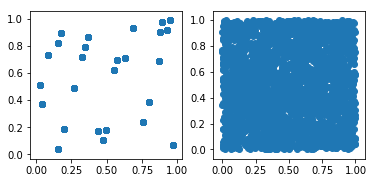

In [29]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)

ax1.scatter(Nsimple[Even],Nsimple[~Even])
ax2.scatter(Nrand48[Even],Nrand48[~Even])

# Calcular los momentos de la distribucion

In [39]:
!git push origin main

Contando objetos: 4, listo.
Delta compression using up to 4 threads.
Comprimiendo objetos: 100% (4/4), listo.
Escribiendo objetos: 100% (4/4), 60.29 KiB | 7.54 MiB/s, listo.
Total 4 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/asegura4488/MetodosCompu2021.git
   aa687a6..207e585  main -> main


In [48]:
setname = 'drand48'

rand = MyRandom(seed = 16, method=setname)

moments = []

points = np.linspace(1,1e6,11)
print(points)

[1.000000e+00 1.000009e+05 2.000008e+05 3.000007e+05 4.000006e+05
 5.000005e+05 6.000004e+05 7.000003e+05 8.000002e+05 9.000001e+05
 1.000000e+06]


In [49]:
for k in tqdm(range(3)):
    
    test = []
    for i in range(len(points)):
        test.append(rand.TestMethod(int(points[i]),k+1,45,setname))
        
    moments.append(test)

100%|██████████| 3/3 [00:37<00:00, 12.66s/it]


In [50]:
print(moments[2])

[0.2499999344926368, 0.1573405764384592, 0.01647820690951629, 0.031205838223846854, 0.3406608717220334, 0.0957333230068927, 0.09677791106359854, 0.022417307469604898, 0.15697016922900411, 0.2085472547274906, 0.2035624754447296]


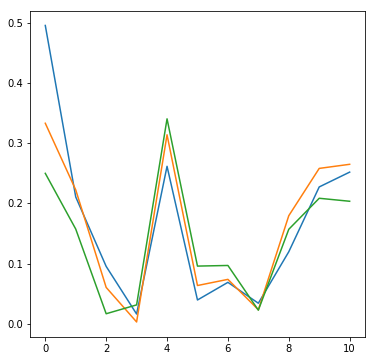

In [51]:
fig = plt.figure( figsize=(6,6) )

for i in range(len(moments)):
    plt.plot(moments[i])
    


# Generacion de eventos usando numpy

In [55]:
x = np.random.rand()
print(x)

0.677844382109


In [57]:
vec = np.random.rand(3)
print(vec)

[0.8375673  0.98315548 0.02421719]


In [58]:
matrix = np.random.rand(2,4)
print(matrix)

[[0.9349675  0.69744793 0.60989172 0.35206676]
 [0.75291512 0.01024852 0.91572908 0.47336307]]


In [59]:
a = []

for i in tqdm(range(10000)):
    a.append(np.random.uniform(-5,5))

100%|██████████| 10000/10000 [00:00<00:00, 159028.16it/s]


(array([0.10482478, 0.09962355, 0.09282194, 0.10622511, 0.09882336,
        0.0994235 , 0.09862331, 0.09322203, 0.10102388, 0.1028243 ,
        0.09922345, 0.10442468, 0.09802317, 0.10902577, 0.09642279,
        0.10262426, 0.10622511, 0.09442232, 0.09582265, 0.09682288]),
 array([-4.99867417e+00, -4.49879234e+00, -3.99891052e+00, -3.49902869e+00,
        -2.99914686e+00, -2.49926504e+00, -1.99938321e+00, -1.49950139e+00,
        -9.99619563e-01, -4.99737738e-01,  1.44087462e-04,  5.00025913e-01,
         9.99907738e-01,  1.49978956e+00,  1.99967139e+00,  2.49955321e+00,
         2.99943504e+00,  3.49931686e+00,  3.99919869e+00,  4.49908052e+00,
         4.99896234e+00]),
 <a list of 20 Patch objects>)

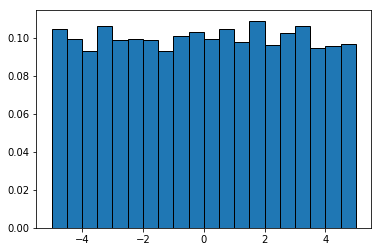

In [63]:
plt.hist(a,20,density=True,edgecolor='black')

In [64]:
poisson = []
gauss = []

for i in range(1000):
    poisson = np.append(poisson, np.random.poisson())
    gauss = np.append(gauss, np.random.standard_normal())

(array([0.692, 0.   , 0.742, 0.   , 0.392, 0.   , 0.132, 0.   , 0.036,
        0.006]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

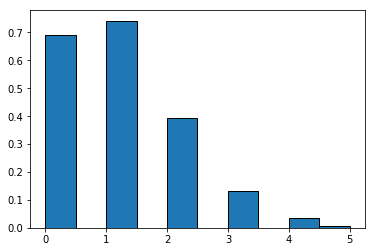

In [65]:
plt.hist(poisson,bins=10,density=True,edgecolor='black')

(array([0.00921439, 0.03839329, 0.10596548, 0.28718181, 0.40236168,
        0.32711083, 0.24110986, 0.08907243, 0.0291789 , 0.00614293]),
 array([-3.21813516, -2.56697971, -1.91582425, -1.2646688 , -0.61351334,
         0.03764211,  0.68879757,  1.33995302,  1.99110848,  2.64226393,
         3.29341939]),
 <a list of 10 Patch objects>)

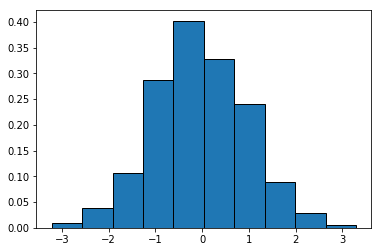

In [66]:
plt.hist(gauss,bins=10,density=True,edgecolor='black')